In [ ]:
import tensorflow as tf

In [ ]:
cifar10 = tf.keras.datasets.cifar10.load_data()
(X_train_full, y_train_full), (X_test, y_test) = cifar10

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [ ]:
X_train_full.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
X_train, y_train = X_train_full[:-10000], y_train_full[:-10000]
X_valid, y_valid = X_train_full[-10000:], y_train_full[-10000:]

In [ ]:
X_valid.shape

(10000, 32, 32, 3)

In [ ]:
X_train.shape

(40000, 32, 32, 3)

In [ ]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
X_train, X_valid, X_test = X_train/255., X_valid/255., X_test/255.

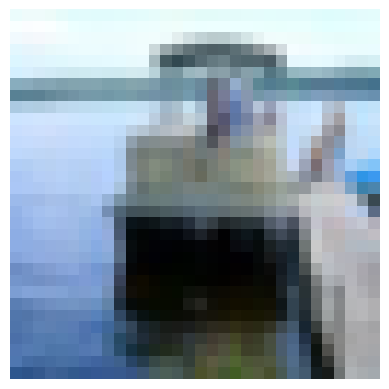

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[39999])
plt.axis('off')
plt.show();

<ipython-input-11-c35144cb60c5>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(labels[int(y_train[index])])


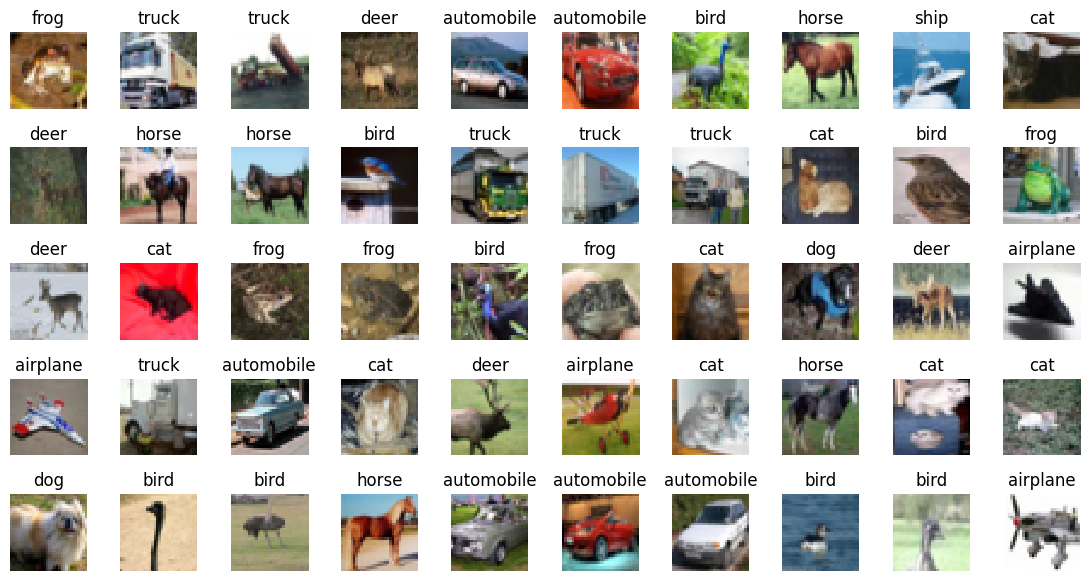

In [ ]:
n_rows = 5
n_cols = 10

plt.figure(figsize=(n_cols*1.4, n_rows*1.4))
for row in range(n_rows):
  for col in range(n_cols):
    index = n_cols * row + col
    plt.subplot(n_rows, n_cols, index+1)
    plt.imshow(X_train[index], interpolation='nearest')
    plt.axis('off')
    plt.title(labels[int(y_train[index])])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show();

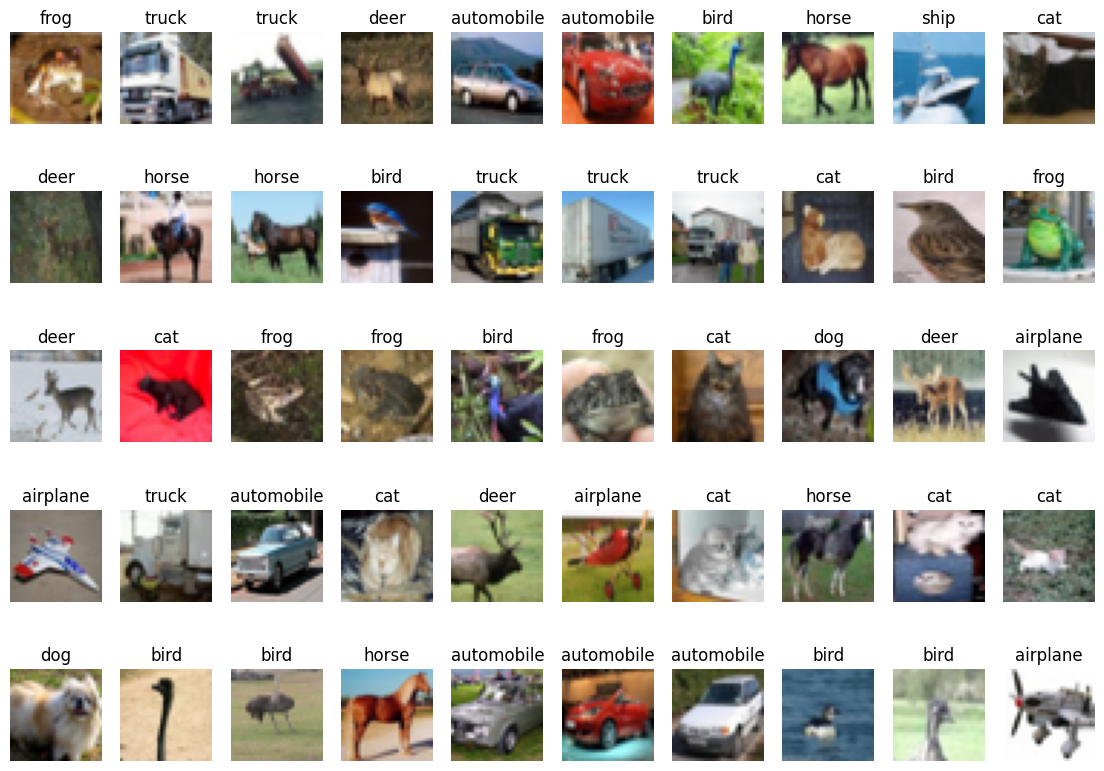

In [ ]:
plt.figure(figsize= (14,10))
for idx, image in enumerate(X_train[:50]):
    plt.subplot(5,10,idx+1)
    plt.imshow(X_train[idx])
    plt.title(labels[y_train[idx][0]])
    plt.axis('off')

plt.show();

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(32,32,3)),
    tf.keras.layers.Flatten()])

for _ in range(20):
  model.add(tf.keras.layers.Dense(100, activation='swish', kernel_initializer='he_normal'))

model.add(tf.keras.layers.Dense(10, activation='softmax', kernel_initializer='glorot_normal'))

In [ ]:
model.compile(loss='SparseCategoricalCrossentropy',
              optimizer = tf.keras.optimizers.Nadam(learning_rate = 5e-5),
              metrics = ['accuracy'])
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=30, validation_data = (X_valid, y_valid), callbacks=[early_stopping])

Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.1655 - loss: 2.1851 - val_accuracy: 0.3029 - val_loss: 1.8898
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.3198 - loss: 1.8424 - val_accuracy: 0.3594 - val_loss: 1.7708
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.3660 - loss: 1.7366 - val_accuracy: 0.3811 - val_loss: 1.7120
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.3939 - loss: 1.6706 - val_accuracy: 0.3898 - val_loss: 1.6779
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4107 - loss: 1.6229 - val_accuracy: 0.4027 - val_loss: 1.6538
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.4259 - loss: 1.5847 - val_accuracy: 0.4115 - val_loss: 1.6382
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.4380 - loss: 1.5515 - val_accuracy: 0.4164 - val_loss: 1.6253
Epoch 8/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.4484 - loss: 1.52

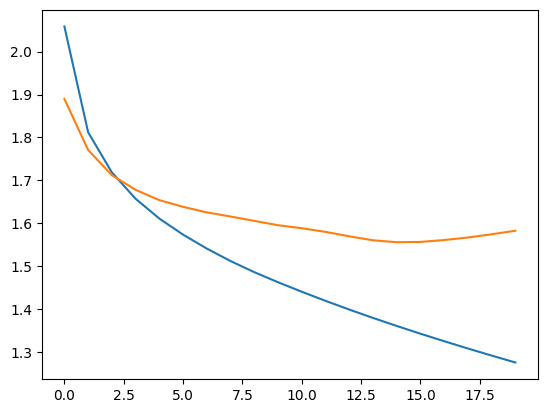

In [ ]:
loss =history.history['loss']
val_loss =history.history['val_loss']

plt.plot(loss)
plt.plot(val_loss)

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         307,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,500,633 (5.72 MB)

 Trainable params: 500,210 (1.91 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,000,423 (3.82 MB)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters=32, kernel_size=7, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=32, kernel_size=5, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.GlobalMaxPooling2D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='softmax', kernel_initializer='glorot_normal')
])

In [ ]:
model.compile(loss='SparseCategoricalCrossentropy',
              optimizer = tf.keras.optimizers.Nadam(),
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=30, validation_data=(X_valid,y_valid),
          callbacks=[early_stopping])

Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.3098 - loss: 1.9562 - val_accuracy: 0.4293 - val_loss: 1.5712
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4629 - loss: 1.4972 - val_accuracy: 0.4799 - val_loss: 1.4127
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5455 - loss: 1.2921 - val_accuracy: 0.5645 - val_loss: 1.2166
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.5897 - loss: 1.1694 - val_accuracy: 0.6040 - val_loss: 1.0998
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6308 - loss: 1.0557 - val_accuracy: 0.5882 - val_loss: 1.1879
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6575 - loss: 0.9761 - val_accuracy: 0.5858 - val_loss: 1.2053
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6759 - loss: 0.9164 - val_accuracy: 0.6141 - val_loss: 1.1187
Epoch 8/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6974 - loss: 0.857

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters=32, kernel_size=7, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=32, kernel_size=5, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', kernel_initializer='he_normal'),
    # tf.keras.layers.GlobalMaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(20, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='softmax', kernel_initializer='glorot_normal')
])

In [ ]:
model.compile(loss='SparseCategoricalCrossentropy',
              optimizer = tf.keras.optimizers.Nadam(),
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=30, validation_data=(X_valid,y_valid),
          callbacks=[early_stopping])

Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.1706 - loss: 2.1685 - val_accuracy: 0.1512 - val_loss: 2.3101
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.2528 - loss: 1.9114 - val_accuracy: 0.3589 - val_loss: 1.7405
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.3179 - loss: 1.7535 - val_accuracy: 0.4080 - val_loss: 1.6388
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.3864 - loss: 1.6023 - val_accuracy: 0.4869 - val_loss: 1.4172
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.4825 - loss: 1.4145 - val_accuracy: 0.5186 - val_loss: 1.3812
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.5445 - loss: 1.2752 - val_accuracy: 0.5640 - val_loss: 1.2759
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5865 - loss: 1.1694 - val_accuracy: 0.6021 - val_loss: 1.1470
Epoch 8/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6191 - loss: 1.082

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters=32, kernel_size=7, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=32, kernel_size=5, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    # tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', kernel_initializer='he_normal'),
    # tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', kernel_initializer='he_normal'),
    # tf.keras.layers.GlobalMaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(30, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax', kernel_initializer='glorot_normal')
])

In [ ]:
model.compile(loss='SparseCategoricalCrossentropy',
              optimizer = tf.keras.optimizers.Adam(1e-3),
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=30, validation_data=(X_valid,y_valid),
          callbacks=[early_stopping])

Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.2460 - loss: 2.2393 - val_accuracy: 0.3863 - val_loss: 1.6636
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.3741 - loss: 1.7059 - val_accuracy: 0.4519 - val_loss: 1.5105
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.4410 - loss: 1.5410 - val_accuracy: 0.5148 - val_loss: 1.3732
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4886 - loss: 1.4132 - val_accuracy: 0.5523 - val_loss: 1.2521
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5279 - loss: 1.3133 - val_accuracy: 0.6051 - val_loss: 1.1254
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5588 - loss: 1.2226 - val_accuracy: 0.6026 - val_loss: 1.1467
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5879 - loss: 1.1475 - val_accuracy: 0.6273 - val_loss: 1.0763
Epoch 8/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6049 - loss: 1.0925 

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters=32, kernel_size=5, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', kernel_initializer='he_normal'),
    # tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.GlobalMaxPooling2D(),
    # tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(30, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='softmax', kernel_initializer='glorot_normal')
])

In [ ]:
model.compile(loss='SparseCategoricalCrossentropy',
              optimizer = tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=30, validation_data=(X_valid,y_valid),
          callbacks=[early_stopping])

Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.2261 - loss: 2.1657 - val_accuracy: 0.3542 - val_loss: 1.7137
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.3905 - loss: 1.6318 - val_accuracy: 0.5049 - val_loss: 1.4025
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.4656 - loss: 1.4324 - val_accuracy: 0.5629 - val_loss: 1.2614
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5108 - loss: 1.3097 - val_accuracy: 0.6223 - val_loss: 1.0810
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.5464 - loss: 1.2180 - val_accuracy: 0.6280 - val_loss: 1.0487
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.5731 - loss: 1.1426 - val_accuracy: 0.6562 - val_loss: 0.9874
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5959 - loss: 1.0834 - val_accuracy: 0.6558 - val_loss: 0.9983
Epoch 8/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6111 - loss: 1.04

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters=32, kernel_size=5, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.GlobalMaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(30, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='softmax', kernel_initializer='glorot_normal')
])

In [ ]:
model.compile(loss='SparseCategoricalCrossentropy',
              optimizer = tf.keras.optimizers.Adam(learning_rate = 5e-4),
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=30, validation_data=(X_valid,y_valid),
          callbacks=[early_stopping])

Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 0.2552 - loss: 2.0768 - val_accuracy: 0.4827 - val_loss: 1.4423
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step - accuracy: 0.4721 - loss: 1.4563 - val_accuracy: 0.5910 - val_loss: 1.1594
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 19ms/step - accuracy: 0.5662 - loss: 1.2246 - val_accuracy: 0.6517 - val_loss: 0.9701
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.6283 - loss: 1.0594 - val_accuracy: 0.6918 - val_loss: 0.8828
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.6786 - loss: 0.9291 - val_accuracy: 0.7080 - val_loss: 0.8436
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.7172 - loss: 0.8121 - val_accuracy: 0.7354 - val_loss: 0.7723
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.7594 - loss: 0.6905 - val_accuracy: 0.7405 - val_loss: 0.7798
Epoch 8/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 20ms/step - accuracy: 0.7994 -